# Bezirke & und Bevölkerung

## Imports

In [1]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Basispfad -> anpassen, falls dein Projektordner anders heißt
BASE_DIR = Path("..")  # im Notebook-Ordner eine Ebene nach oben
RAW_DIR = BASE_DIR / "data" / "raw"
INTERIM_DIR = BASE_DIR / "data" / "interim"

RAW_DIR, INTERIM_DIR


(PosixPath('../data/raw'), PosixPath('../data/interim'))

## Laden Datensätze

### Stadtbezirke

In [2]:
# GeoJSON / Shapefile der Stadtbezirke laden
gdf_bezirke = gpd.read_file(RAW_DIR / "muc_stadtbezirke.geojson")

print(gdf_bezirke.shape)
gdf_bezirke.head()


(27, 8)


,id,objectid,x,y,sb_nummer,name,flaeche_qm,geometry
0,vablock_stadtbezirke_opendata.1,2,690961.6772,5.337944e+06,04,Schwabing-West,4.363287e+06,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
1,vablock_stadtbezirke_opendata.2,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((685540.466 5327534.649, 685543.41 53..."
2,vablock_stadtbezirke_opendata.3,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((689968.496 5331316.396, 689963.03 53..."
3,vablock_stadtbezirke_opendata.4,13,699191.3166,5.333487e+06,15,Trudering-Riem,2.245392e+07,"POLYGON ((698523.625 5337387.299, 698428.438 5..."
4,vablock_stadtbezirke_opendata.5,24,683362.5274,5.336113e+06,21,Pasing-Obermenzing,1.649754e+07,"POLYGON ((682919.357 5338681.106, 682929.131 5..."


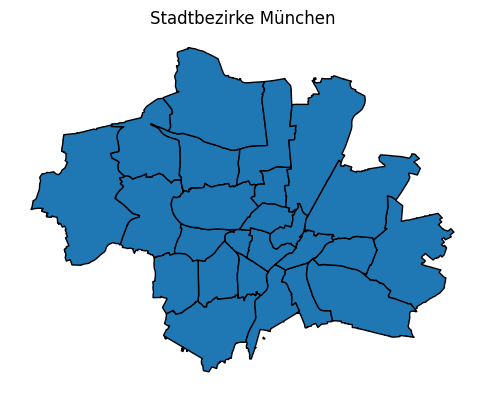

Index(['id', 'objectid', 'x', 'y', 'sb_nummer', 'name', 'flaeche_qm',
       'geometry'],
      dtype='object')

In [3]:
ax = gdf_bezirke.plot(edgecolor="black", figsize=(6, 6))
ax.set_title("Stadtbezirke München")
plt.axis("off")
plt.show()

gdf_bezirke.columns


### Bevölkerung der Stadtbezirke (Stand:31.12.2024)

In [4]:
df_bev = pd.read_csv(RAW_DIR / "bev_stadtbezirke.csv", sep=",", decimal=",")  # Separator je nach Datei

print(df_bev.shape)
df_bev.head()
df_bev.columns


(26, 7)


Index(['stadtbezirksnummer', 'stadtbezirk', 'bevölkerung',
       'bevölkerung in prozent', 'fläche in ha', 'fläche in prozent',
       'einwohnerdichte'],
      dtype='object')

In [5]:
df_bev.head()

,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,1,Altstadt - Lehel,20876,1.3,314.59,1,66
1,2,Ludwigsvorstadt - Isarvorstadt,50081,3.1,440.17,1.4,114
2,3,Maxvorstadt,52434,3.3,429.82,1.4,122
3,4,Schwabing West,68610,4.3,436.33,1.4,157
4,5,Au - Haidhausen,63972,4,422.00,1.4,152


## Merging Datensätze  Stadtbezirke & Bevölkerung + Cleaning

### Merging

In [6]:
# Kopien erstellen
gdf = gdf_bezirke.copy()
dfb = df_bev.copy()

# Beide Nummern auf den gleichen Datentyp bringen (z.B. int)
gdf["bez_nr"] = gdf["sb_nummer"].astype(int)
dfb["bez_nr"] = dfb["stadtbezirksnummer"].astype(int)

# Überprüfen, ob die Sets übereinstimmen
print(sorted(gdf["bez_nr"].unique()))
print(sorted(dfb["bez_nr"].unique()))



[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25)]
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26)]


In [7]:
# Merge durchführen
gdf_merged = gdf.merge(
    dfb,
    on="bez_nr",
    how="left"  # alle Bezirke behalten, auch wenn mal was in dfb fehlt
)

print(gdf_merged.shape)
gdf_merged.head(30)



(27, 16)


,id,objectid,x,y,sb_nummer,name,flaeche_qm,geometry,bez_nr,stadtbezirksnummer,stadtbezirk,bevölkerung,bevölkerung in prozent,fläche in ha,fläche in prozent,einwohnerdichte
0,vablock_stadtbezirke_opendata.1,2,690961.6772,5.337944e+06,04,Schwabing-West,4.363287e+06,"POLYGON ((691821.837 5339259.125, 691767.291 5...",4,4,Schwabing West,68610,4.3,436.33,1.4,157
1,vablock_stadtbezirke_opendata.2,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((685540.466 5327534.649, 685543.41 53...",19,19,Thalkirchen - Obersendling - Forstenried - Für...,103717,6.5,1776.35,5.7,58
2,vablock_stadtbezirke_opendata.3,20,687008.1953,5.328879e+06,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1.776349e+07,"POLYGON ((689968.496 5331316.396, 689963.03 53...",19,19,Thalkirchen - Obersendling - Forstenried - Für...,103717,6.5,1776.35,5.7,58
3,vablock_stadtbezirke_opendata.4,13,699191.3166,5.333487e+06,15,Trudering-Riem,2.245392e+07,"POLYGON ((698523.625 5337387.299, 698428.438 5...",15,15,Trudering - Riem,76280,4.8,2245.39,7.2,34
4,vablock_stadtbezirke_opendata.5,24,683362.5274,5.336113e+06,21,Pasing-Obermenzing,1.649754e+07,"POLYGON ((682919.357 5338681.106, 682929.131 5...",21,21,Pasing - Obermenzing,81804,5.1,1649.75,5.3,50
5,vablock_stadtbezirke_opendata.6,15,690462.8434,5.333823e+06,02,Ludwigsvorstadt-Isarvorstadt,4.401651e+06,"POLYGON ((689722.841 5335359.37, 689570.385 53...",2,2,Ludwigsvorstadt - Isarvorstadt,50081,3.1,440.17,1.4,114
6,vablock_stadtbezirke_opendata.7,25,686878.4758,5.339358e+06,10,Moosach,1.109367e+07,"POLYGON ((683486.613 5341924.198, 683481.27 53...",10,10,Moosach,56015,3.5,1109.37,3.6,50
7,vablock_stadtbezirke_opendata.8,1,682898.7760,5.340522e+06,23,Allach-Untermenzing,1.545119e+07,"POLYGON ((684558.078 5342934.959, 684558.412 5...",23,23,Allach - Untermenzing,36230,2.3,1545.12,5,23
8,vablock_stadtbezirke_opendata.9,7,687175.6088,5.343003e+06,24,Feldmoching-Hasenbergl,2.893845e+07,"POLYGON ((687534.976 5346097.716, 687507.106 5...",24,24,Feldmoching - Hasenbergl,63756,4,2893.85,9.3,22
9,vablock_stadtbezirke_opendata.10,9,691525.6042,5.330725e+06,18,Untergiesing-Harlaching,8.057218e+06,"POLYGON ((690447.74 5328289.784, 690497.261 53...",18,18,Untergiesing - Harlaching,54067,3.4,805.72,2.6,67


### Cleaning

In [8]:
# Für die weitere Arbeit nur relevante Spalten auswählen und umbenennen
gdf_work = gdf_merged[[
    "bez_nr",
    "name",          # Bezirksname aus Geo
    "stadtbezirk",   # Bezirksname aus Statistik
    "bevölkerung",
    "fläche in ha",
    "einwohnerdichte",
    "geometry",
]].rename(columns={
    "bevölkerung": "einwohner",
    "fläche in ha": "flaeche_ha",
})


In [9]:
gdf_work.head(30)

,bez_nr,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte,geometry
0,4,Schwabing-West,Schwabing West,68610,436.33,157,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
1,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((685540.466 5327534.649, 685543.41 53..."
2,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((689968.496 5331316.396, 689963.03 53..."
3,15,Trudering-Riem,Trudering - Riem,76280,2245.39,34,"POLYGON ((698523.625 5337387.299, 698428.438 5..."
4,21,Pasing-Obermenzing,Pasing - Obermenzing,81804,1649.75,50,"POLYGON ((682919.357 5338681.106, 682929.131 5..."
5,2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt - Isarvorstadt,50081,440.17,114,"POLYGON ((689722.841 5335359.37, 689570.385 53..."
6,10,Moosach,Moosach,56015,1109.37,50,"POLYGON ((683486.613 5341924.198, 683481.27 53..."
7,23,Allach-Untermenzing,Allach - Untermenzing,36230,1545.12,23,"POLYGON ((684558.078 5342934.959, 684558.412 5..."
8,24,Feldmoching-Hasenbergl,Feldmoching - Hasenbergl,63756,2893.85,22,"POLYGON ((687534.976 5346097.716, 687507.106 5..."
9,18,Untergiesing-Harlaching,Untergiesing - Harlaching,54067,805.72,67,"POLYGON ((690447.74 5328289.784, 690497.261 53..."


In [10]:
gdf_work = gdf_work.sort_values("bez_nr").reset_index(drop=True)

In [11]:
gdf_work.head(30)

,bez_nr,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte,geometry
0,1,Altstadt-Lehel,Altstadt - Lehel,20876,314.59,66,"POLYGON ((692704.77 5336941.154, 692682.921 53..."
1,2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt - Isarvorstadt,50081,440.17,114,"POLYGON ((689722.841 5335359.37, 689570.385 53..."
2,3,Maxvorstadt,Maxvorstadt,52434,429.82,122,"POLYGON ((690674.877 5336921.715, 690657.282 5..."
3,4,Schwabing-West,Schwabing West,68610,436.33,157,"POLYGON ((691821.837 5339259.125, 691767.291 5..."
4,5,Au-Haidhausen,Au - Haidhausen,63972,422.00,152,"POLYGON ((693021.981 5335306.773, 693021.084 5..."
5,6,Sendling,Sendling,41002,393.89,104,"POLYGON ((688743.237 5333793.444, 688732.857 5..."
6,7,Sendling-Westpark,Sendling - Westpark,62240,781.49,80,"POLYGON ((687931.605 5334552.238, 687876.365 5..."
7,8,Schwanthalerhöhe,Schwanthalerhöhe,28684,207.03,139,"POLYGON ((689091.353 5335270.96, 688991.703 53..."
8,9,Neuhausen-Nymphenburg,Neuhausen - Nymphenburg,101 901,1291.49,79,"POLYGON ((689485.672 5338343.264, 689471.049 5..."
9,10,Moosach,Moosach,56015,1109.37,50,"POLYGON ((683486.613 5341924.198, 683481.27 53..."


Tabelle X: Überblick über die Münchner Stadtbezirke (Basisdatensatz)

**Beschreibung:**  
Die Tabelle zeigt alle Münchner Stadtbezirke, sortiert nach Bezirksnummer (`bez_nr`). Für jeden Bezirk sind Name (`name`/`stadtbezirk`), Einwohnerzahl, Fläche in Hektar (`flaeche_ha`), Einwohnerdichte (Einwohner pro Hektar) und die Geometrie hinterlegt. Die Daten stammen aus der Kombination von Geodaten der Stadtbezirke und der Bevölkerungsstatistik.

**Erste Beobachtungen:**  
- Die Einwohnerzahl reicht von kleinen Bezirken mit rund 20.000 Einwohnern (z. B. Altstadt–Lehel) bis zu sehr großen Bezirken mit über 120.000 Einwohnern (z. B. Ramersdorf–Perlach).  
- Die Flächenausdehnung unterscheidet sich stark: kompakte Innenstadtbezirke stehen großflächigen Außenbezirken gegenüber, was sich in stark variierenden Einwohnerdichten niederschlägt.  
- Bereits hier wird sichtbar, dass München aus sehr unterschiedlichen Bezirksprofilen besteht (dichte Innenstadt vs. eher lockere Randlagen).

**Datenbereinigung:**  
- In den ursprünglichen Geodaten lagen einige Bezirke (z. B. 18 und 19) als mehrere Polygone mit identischer Bezirksnummer vor. Diese Doppelungen wird im Anschluss über eine `dissolve`-Operation nach `bez_nr` zu genau einem (Multi-)Polygon je Stadtbezirk zusammengeführt. 


In [12]:
# Auf Duplikate in bez_nr prüfen
gdf_work[gdf_work["bez_nr"].duplicated(keep=False)].sort_values("bez_nr")


,bez_nr,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte,geometry
17,18,Untergiesing-Harlaching,Untergiesing - Harlaching,54067,805.72,67,"POLYGON ((690447.74 5328289.784, 690497.261 53..."
18,18,Untergiesing-Harlaching,Untergiesing - Harlaching,54067,805.72,67,"POLYGON ((691220.643 5333055.074, 691217.702 5..."
19,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((685540.466 5327534.649, 685543.41 53..."
20,19,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Thalkirchen - Obersendling - Forstenried - Für...,103717,1776.35,58,"POLYGON ((689968.496 5331316.396, 689963.03 53..."


In [13]:
# Duplikate in bez_nr ansehen (nur zur Kontrolle)
gdf_work[gdf_work["bez_nr"].duplicated(keep=False)].sort_values("bez_nr")

# Aggregationslogik für Nicht-Geometrie-Spalten
agg_dict = {
    "name": "first",
    "stadtbezirk": "first",
    "einwohner": "first",
    "flaeche_ha": "first",
    "einwohnerdichte": "first",
}

# Zu genau einem Feature je bez_nr zusammenfassen
gdf_clean = (
    gdf_work
    .dissolve(by="bez_nr", aggfunc=agg_dict)
    .reset_index()
)

# kurzer Check
gdf_clean["bez_nr"].value_counts().max(), gdf_clean.shape


(np.int64(1), (25, 7))

Behandlung von mehrfach vorkommenden Stadtbezirken

**Ziel:**  
Sicherstellen, dass jeder Stadtbezirk nur **ein Geometrie-Objekt** im Datensatz hat, damit spätere Auswertungen eindeutig auf Ebene `bez_nr` erfolgen können.

**Vorgehen:**  
1. Zunächst wurden über `gdf_work["bez_nr"].duplicated(keep=False)` alle Bezirksnummern identifiziert, die mehr als einmal vorkommen. Dabei zeigte sich, dass insbesondere die Bezirke **18 (Untergiesing–Harlaching)** und **19 (Thalkirchen–Obersendling–Forstenried–Fürstenried–Solln)** jeweils in zwei Zeilen vorhanden sind – mit identischen Attributen, aber getrennten Polygon-Geometrien.  
2. Um diese Mehrfach-Geometrien zu bereinigen, wurde der Datensatz mit `dissolve(by="bez_nr", aggfunc=agg_dict)` nach `bez_nr` aggregiert.  
   - Die Geometrien der jeweiligen Teilflächen wurden dabei zu einem (Multi-)Polygon je Bezirk zusammengefasst.  
   - Für die nicht-geometrischen Attribute (Name, Einwohner, Fläche, Einwohnerdichte etc.) wurde im Aggregationsdictionary `agg_dict` jeweils der erste Wert (`"first"`) verwendet, da die Attributwerte in den Duplikaten identisch sind.  
3. Ein anschließender Kontrollschritt (`gdf_clean["bez_nr"].value_counts().max(), gdf_clean.shape`) bestätigt, dass im bereinigten Datensatz `gdf_clean` nun **25 eindeutige Stadtbezirke** mit jeweils genau einer Zeile vorhanden sind.

**Ergebnis:**  
Der bereinigte Datensatz `gdf_clean` bildet die Grundlage für alle weiteren räumlichen Analysen, da jeder Stadtbezirk nun eindeutig über `bez_nr` referenziert wird und keine Mehrfachgeometrien mehr existieren.



In [14]:
gdf_clean

,bez_nr,geometry,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte
0,1,"POLYGON ((692704.77 5336941.154, 692682.921 53...",Altstadt-Lehel,Altstadt - Lehel,20876,314.59,66
1,2,"POLYGON ((689722.841 5335359.37, 689570.385 53...",Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt - Isarvorstadt,50081,440.17,114
2,3,"POLYGON ((690674.877 5336921.715, 690657.282 5...",Maxvorstadt,Maxvorstadt,52434,429.82,122
3,4,"POLYGON ((691821.837 5339259.125, 691767.291 5...",Schwabing-West,Schwabing West,68610,436.33,157
4,5,"POLYGON ((693021.981 5335306.773, 693021.084 5...",Au-Haidhausen,Au - Haidhausen,63972,422.00,152
5,6,"POLYGON ((688743.237 5333793.444, 688732.857 5...",Sendling,Sendling,41002,393.89,104
6,7,"POLYGON ((687931.605 5334552.238, 687876.365 5...",Sendling-Westpark,Sendling - Westpark,62240,781.49,80
7,8,"POLYGON ((689091.353 5335270.96, 688991.703 53...",Schwanthalerhöhe,Schwanthalerhöhe,28684,207.03,139
8,9,"POLYGON ((689485.672 5338343.264, 689471.049 5...",Neuhausen-Nymphenburg,Neuhausen - Nymphenburg,101 901,1291.49,79
9,10,"POLYGON ((683486.613 5341924.198, 683481.27 53...",Moosach,Moosach,56015,1109.37,50


In [15]:
# Datentypen anzeigen
gdf_clean.dtypes


bez_nr                int64
geometry           geometry
name                 object
stadtbezirk          object
einwohner            object
flaeche_ha           object
einwohnerdichte       int64
dtype: object

In [16]:
# Umwandlung der Datentypen
numeric_cols = ["einwohner", "flaeche_ha"]  # dichte ist schon numerisch

gdf_clean["einwohner"] = (
    gdf_work["einwohner"].astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(" ", "", regex=False)
    .astype("int64")
)

gdf_clean["flaeche_ha"] = (
    gdf_work["flaeche_ha"].astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.replace(" ", "", regex=False)
    .astype("float64")
)
gdf_clean.dtypes

bez_nr                int64
geometry           geometry
name                 object
stadtbezirk          object
einwohner             int64
flaeche_ha          float64
einwohnerdichte       int64
dtype: object

**Bereinigung der Datentypen für Einwohner und Fläche**

**Ziel:**  
Sicherstellen, dass zentrale Kennzahlen wie Einwohnerzahl und Bezirksfläche als numerische Variablen vorliegen, damit statistische Auswertungen und Berechnungen (z. B. Dichte, Kennzahlen pro Einwohner) korrekt durchgeführt werden können.

**Vorgehen:**  
- In der Ausgangsversion des Datensatzes `gdf_clean` lagen die Spalten `einwohner` und `flaeche_ha` als `object`-Typ vor, da sie aus der CSV-Datei mit Tausendertrennzeichen bzw. Dezimalkommas eingelesen wurden.  
- Für beide Spalten wurden nicht-numerische Zeichen entfernt bzw. angepasst (z. B. Entfernen von Punkten als Tausendertrennzeichen, Ersetzen von Komma durch Punkt als Dezimaltrennzeichen).  
- Anschließend wurden  
  - `einwohner` in einen ganzzahligen Datentyp (`int64`)  
  - `flaeche_ha` in einen Fließkomma-Datentyp (`float64`)  
  umgewandelt.  

**Ergebnis:**  
- `gdf_clean.dtypes` zeigt nun, dass `einwohner` und `flaeche_ha` numerisch vorliegen, während `einwohnerdichte` bereits zuvor numerisch war.  
- Damit können `describe()`, Histogramme, Korrelationen und spätere Berechnungen (z. B. Parks pro 1.000 Einwohner oder Fläche) ohne weitere Typkonflikte durchgeführt werden.


### Plausibilitätscheck 



1. **Gesamtbevölkerung:**  
   Mit `gdf_clean["einwohner"].sum()` wird die Summe der Einwohner über alle Stadtbezirke berechnet (≈ 1,65 Mio. Einwohner). Dieser Wert liegt in der erwartbaren Größenordnung der Gesamtbevölkerung Münchens und bestätigt, dass die Umwandlung der Einwohnerzahlen (z. B. Entfernen von Tausendertrennzeichen) korrekt erfolgt ist.

2. **Vergleich der Einwohnerdichte:**  
   Über `dichte_neu = einwohner / flaeche_ha` wird eine neue Dichtekennzahl berechnet und der vorhandenen Spalte `einwohnerdichte` gegenübergestellt. Die Gegenüberstellung in der Tabelle (`bez_nr`, `name`, `einwohner`, `einwohnerdichte`, `dichte_neu`) dient dazu zu prüfen, ob die im Datensatz hinterlegte Dichte konsistent zu Einwohnerzahl und Flächenangabe ist und ob bei der Flächenkonvertierung (z. B. Hektar, Dezimaltrennzeichen) keine systematischen Fehler aufgetreten sind.

3. **Vergleich der Werte mit den Angaben des Statistischen Amts (PDF-Tabelle)** 
   Die Tabelle zeigt, dass Einwohnerzahl und einwohnerdichte in gdf_clean exakt mit den offiziellen Angaben des Statistischen Amts (PDF-Tabelle) übereinstimmen

In [17]:
gdf_clean["einwohner"].sum()


np.int64(1640688)

In [18]:
gdf_clean["dichte_neu"] = gdf_clean["einwohner"] / gdf_clean["flaeche_ha"]

# Vergleich alt vs. neu
gdf_clean[["bez_nr", "name","einwohner","einwohnerdichte", "dichte_neu"]].head(30)


,bez_nr,name,einwohner,einwohnerdichte,dichte_neu
0,1,Altstadt-Lehel,20876,66,0.663594
1,2,Ludwigsvorstadt-Isarvorstadt,50081,114,1.137765
2,3,Maxvorstadt,52434,122,1.219906
3,4,Schwabing-West,68610,157,1.572434
4,5,Au-Haidhausen,63972,152,1.515924
5,6,Sendling,41002,104,1.040951
6,7,Sendling-Westpark,62240,80,0.796427
7,8,Schwanthalerhöhe,28684,139,1.385500
8,9,Neuhausen-Nymphenburg,101901,79,0.789019
9,10,Moosach,56015,50,0.504926


In [19]:
# Hilfsspalte wieder entfernen
if "dichte_neu" in gdf_clean.columns:
    gdf_clean = gdf_clean.drop(columns=["dichte_neu"])

gdf_clean.head()


,bez_nr,geometry,name,stadtbezirk,einwohner,flaeche_ha,einwohnerdichte
0,1,"POLYGON ((692704.77 5336941.154, 692682.921 53...",Altstadt-Lehel,Altstadt - Lehel,20876,31459.0,66
1,2,"POLYGON ((689722.841 5335359.37, 689570.385 53...",Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt - Isarvorstadt,50081,44017.0,114
2,3,"POLYGON ((690674.877 5336921.715, 690657.282 5...",Maxvorstadt,Maxvorstadt,52434,42982.0,122
3,4,"POLYGON ((691821.837 5339259.125, 691767.291 5...",Schwabing-West,Schwabing West,68610,43633.0,157
4,5,"POLYGON ((693021.981 5335306.773, 693021.084 5...",Au-Haidhausen,Au - Haidhausen,63972,42200.0,152


###  Bereinigten Stadtbezirks-Datensatz mit Einwohnern etc. im `interim`-Ordner speichern:


**Beschreibung:**  
Der bereinigte Stadtbezirks-Datensatz `gdf_clean` wird als GeoJSON im Ordner `data/interim/` gespeichert (`muc_bezirke_bev_clean.geojson`), um einen reproduzierbaren Arbeitsstand für alle weiteren Analysen zu sichern. 

1
**Ergebnis:**  
Mit diesen Schritten ist ein konsistenter, bereinigter Geo-Datensatz der Münchner Stadtbezirke vorhanden, der sowohl hinsichtlich Gesamtbevölkerung als auch hinsichtlich der Dichtewerte plausibel ist und als Grundlage für die weitere „Active City“-Analyse verwendet werden kann.

In [20]:
from pathlib import Path

INTERIM_DIR = Path("..") / "data" / "interim"
INTERIM_DIR.mkdir(parents=True, exist_ok=True)

out_path = INTERIM_DIR / "muc_bezirke_bev_clean.geojson"
gdf_clean.to_file(out_path, driver="GeoJSON")
out_path


PosixPath('../data/interim/muc_bezirke_bev_clean.geojson')

## EDA

### Deskriptive Statistik

In [21]:
# Descriptive Statistik der numerischen Spalten
gdf_clean.describe()

,bez_nr,einwohner,flaeche_ha,einwohnerdichte
count,25.000000,25.000000,25.000000,25.000000
mean,13.000000,65627.520000,120930.080000,74.320000
std,7.359801,25088.469056,83922.668437,40.343029
min,1.000000,20876.000000,20703.000000,18.000000
25%,7.000000,51637.000000,44017.000000,50.000000
50%,13.000000,61011.000000,92238.000000,66.000000
75%,19.000000,77281.000000,177635.000000,104.000000
max,25.000000,120776.000000,340573.000000,157.000000


In [22]:
gdf_clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bez_nr           25 non-null     int64   
 1   geometry         25 non-null     geometry
 2   name             25 non-null     object  
 3   stadtbezirk      25 non-null     object  
 4   einwohner        25 non-null     int64   
 5   flaeche_ha       25 non-null     float64 
 6   einwohnerdichte  25 non-null     int64   
dtypes: float64(1), geometry(1), int64(3), object(2)
memory usage: 1.5+ KB


In [23]:
gdf_clean.shape

(25, 7)

In [24]:
gdf_clean.isnull().sum()

bez_nr             0
geometry           0
name               0
stadtbezirk        0
einwohner          0
flaeche_ha         0
einwohnerdichte    0
dtype: int64

### Verteilung Einwohnerzahl & Einwohnerdichte

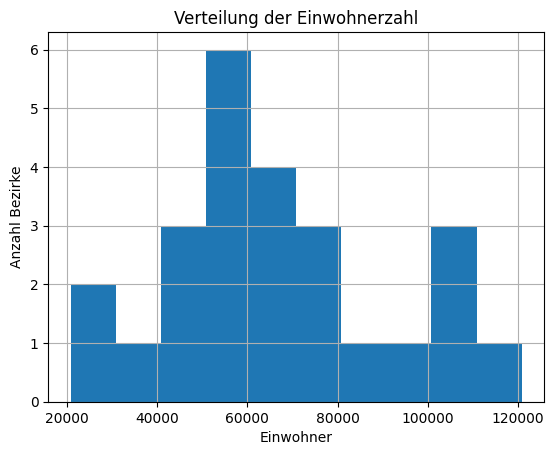

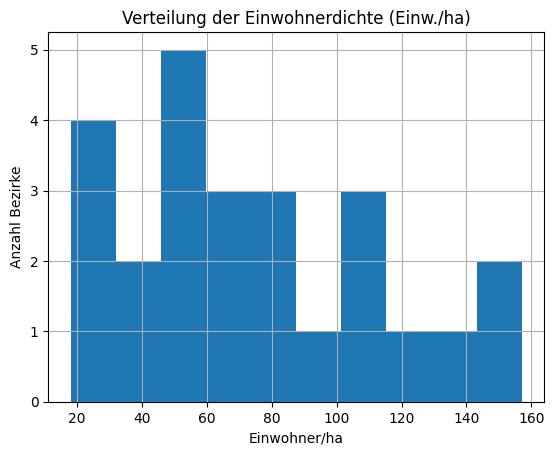

In [25]:
gdf_clean["einwohner"].hist(bins=10)
plt.title("Verteilung der Einwohnerzahl")
plt.xlabel("Einwohner")
plt.ylabel("Anzahl Bezirke")
plt.show()

gdf_clean["einwohnerdichte"].hist(bins=10)
plt.title("Verteilung der Einwohnerdichte (Einw./ha)")
plt.xlabel("Einwohner/ha")
plt.ylabel("Anzahl Bezirke")
plt.show()


**Abbildung X: Verteilung der Einwohnerzahl in den Stadtbezirken**

**Beschreibung:**  
Das Histogramm zeigt, wie sich die Einwohnerzahl auf die 25 Münchner Stadtbezirke verteilt. Jeder Balken steht für einen Wertebereich der Einwohnerzahl, die Höhe für die Anzahl der Bezirke in diesem Bereich.

**Beobachtungen:**  
- Die meisten Stadtbezirke liegen im Bereich von ca. 50.000–80.000 Einwohnern.  
- Es gibt wenige Bezirke mit sehr niedrigen Einwohnerzahlen (z. B. Altstadt–Lehel) und einige mit deutlich höheren Werten (z. B. Ramersdorf–Perlach).  
- Insgesamt zeigt sich eine deutliche Spannweite, d. h. die Stadtbezirke unterscheiden sich erheblich in ihrer absoluten Bevölkerungsgröße.

**Abbildung X: Verteilung der Einwohnerdichte (Einw./ha) in den Stadtbezirken**

**Beschreibung:**  
Das Histogramm stellt die Verteilung der Einwohnerdichte (Einwohner pro Hektar) über alle Stadtbezirke dar. Die x-Achse zeigt Dichteintervalle, die y-Achse die Anzahl der Bezirke je Intervall.

**Beobachtungen:**  
- Die Einwohnerdichte reicht von etwa 20 bis über 150 Einw./ha und variiert damit deutlich zwischen den Bezirken.  
- Ein Teil der Bezirke bündelt sich im mittleren Bereich, einige wenige Bezirke weisen sehr hohe Dichtewerte auf (stark verdichtete, innenstadtnahe Lagen).  
- Die Verteilung unterstreicht, dass nicht nur die Einwohnerzahl, sondern auch die Flächenausdehnung stark differiert – ein wichtiger Kontext für spätere Analysen zur verfügbaren Infrastruktur pro Einwohner.


### Choropletenkarten

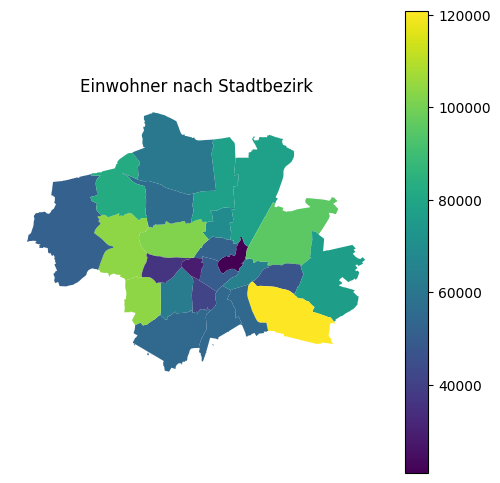

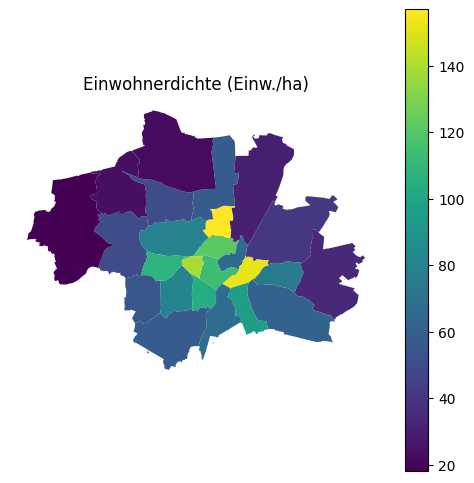

In [26]:
gdf_clean.plot(column="einwohner", legend=True, figsize=(6, 6))
plt.title("Einwohner nach Stadtbezirk")
plt.axis("off")
plt.show()

gdf_clean.plot(column="einwohnerdichte", legend=True, figsize=(6, 6))
plt.title("Einwohnerdichte (Einw./ha)")
plt.axis("off")
plt.show()


**Abbildung X: Einwohner nach Stadtbezirk**

**Beschreibung:**  
Die Choroplethenkarte zeigt die absolute Einwohnerzahl der 25 Münchner Stadtbezirke. Dunklere Farbtöne stehen für Bezirke mit vielen, hellere für Bezirke mit weniger Einwohnern.

**Beobachtungen:**  
- Besonders hohe Einwohnerzahlen finden sich in einigen großflächigen Randbezirken (z. B. im Osten und Südosten), während Altstadt–Lehel und einzelne innenstadtnahe Bezirke deutlich weniger Einwohner haben.  
- Die Verteilung der Einwohnerzahlen folgt damit nicht strikt einem „Innenstadt = viel, Außen = wenig“-Muster, sondern hängt stark von der Flächengröße und Bebauungsstruktur des jeweiligen Bezirks ab.

**Abbildung X: Einwohnerdichte (Einw./ha) nach Stadtbezirk**

**Beschreibung:**  
Diese Choroplethenkarte stellt die Einwohnerdichte (Einwohner pro Hektar) in den Stadtbezirken dar. Dunklere Farben markieren besonders dicht besiedelte Bezirke, hellere Farben Bezirke mit geringerer Dichte.

**Beobachtungen:**  
- Hohe Einwohnerdichten konzentrieren sich vor allem auf innenstadtnahe Bezirke, während peripher gelegene und flächenmäßig große Bezirke eine deutlich geringere Dichte aufweisen.  
- Im Vergleich zur Karte der absoluten Einwohnerzahl wird sichtbar, dass bevölkerungsreiche Bezirke nicht zwingend die höchste Dichte haben – einige kleinere Bezirke sind trotz geringerer Einwohnerzahl deutlich dichter bebaut.



### Bevölkerung & Dichte sortiert

/var/folders/1x/3wj3gwpx4ws0zbb8m_g6s66w0000gp/T/ipykernel_62377/177685601.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


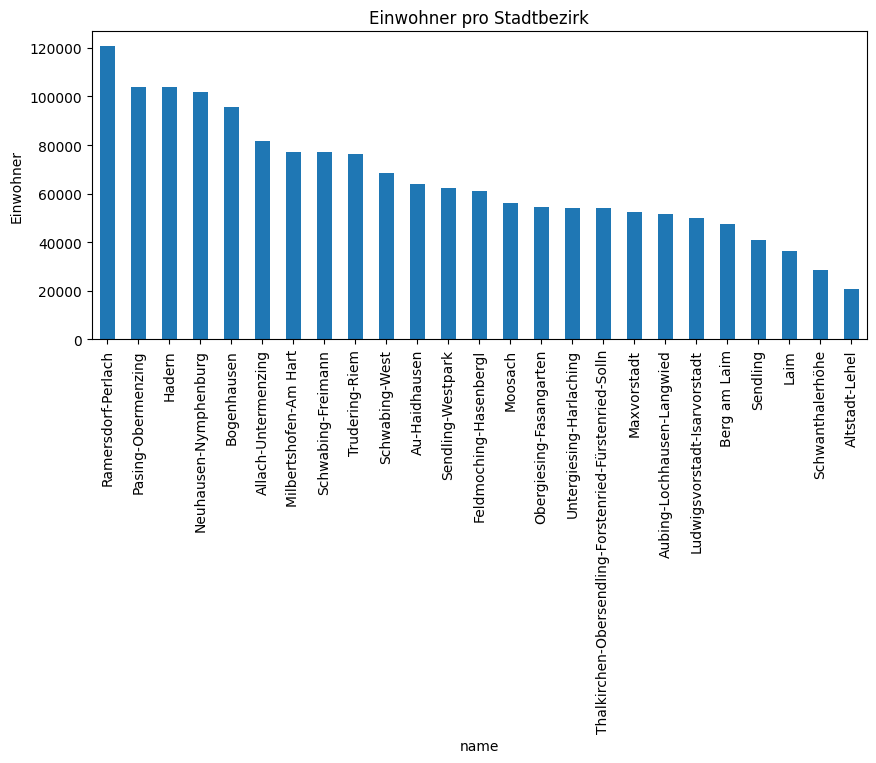

/var/folders/1x/3wj3gwpx4ws0zbb8m_g6s66w0000gp/T/ipykernel_62377/177685601.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


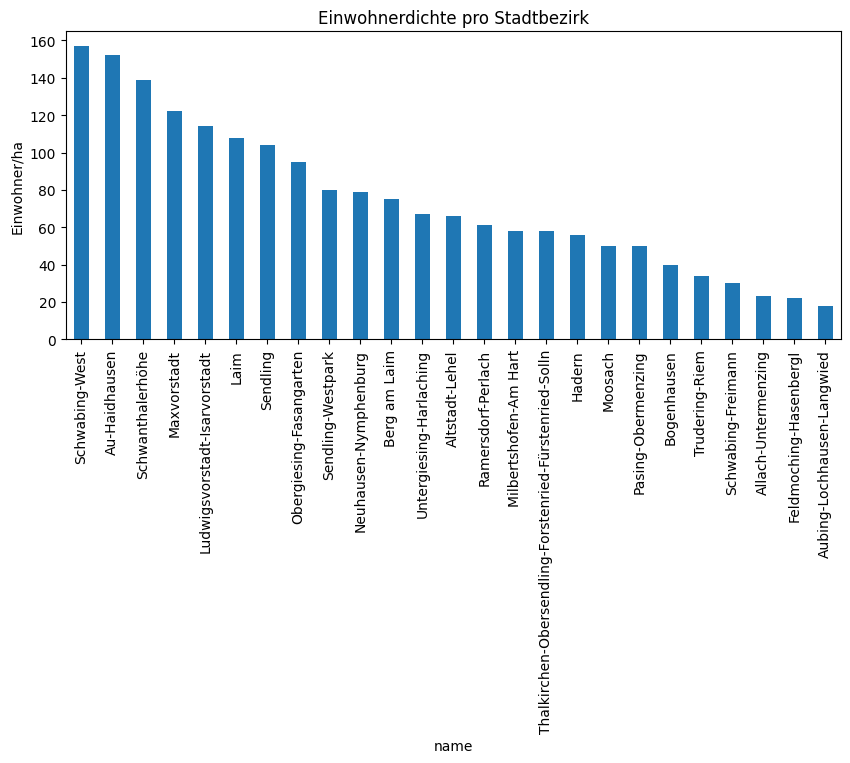

In [27]:
# Bevölkerung sortiert
df_bar = (
    gdf_clean[["name", "einwohner"]]
    .sort_values("einwohner", ascending=False)
)

df_bar.plot(kind="bar", x="name", y="einwohner", figsize=(10, 4), legend=False)
plt.xticks(rotation=90)
plt.ylabel("Einwohner")
plt.title("Einwohner pro Stadtbezirk")
plt.tight_layout()
plt.show()

# Einwohnerdichte sortiert
df_bar = (
    gdf_clean[["name", "einwohnerdichte"]]
    .sort_values("einwohnerdichte", ascending=False)
)

df_bar.plot(kind="bar", x="name", y="einwohnerdichte", figsize=(10, 4), legend=False)
plt.xticks(rotation=90)
plt.ylabel("Einwohner/ha")
plt.title("Einwohnerdichte pro Stadtbezirk")
plt.tight_layout()
plt.show()


**Abbildung X: Einwohnerzahl pro Stadtbezirk (absteigend sortiert)**

**Beschreibung:**  
Das Balkendiagramm zeigt die Einwohnerzahl der Münchner Stadtbezirke, absteigend nach Einwohnerzahl sortiert. Jeder Balken steht für einen Stadtbezirk.

**Beobachtungen:**  
- **Ramersdorf–Perlach**, **Pasing–Obermenzing** und **Neuhausen–Nymphenburg** zählen zu den bevölkerungsreichsten Bezirken mit jeweils rund 90.000 bis über 120.000 Einwohnern.  
- Bezirke wie **Altstadt–Lehel**, **Schwanthalerhöhe** und **Laim** haben im Vergleich deutlich weniger Einwohner und liegen am unteren Ende der Skala.  
- Die Unterschiede zwischen den Bezirken sind beträchtlich, was auf eine ungleich verteilte Bevölkerungszahl im Stadtgebiet hinweist.


**Abbildung X: Einwohnerdichte pro Stadtbezirk (absteigend sortiert)**

**Beschreibung:**  
Das Balkendiagramm stellt die Einwohnerdichte (Einwohner pro Hektar) in den Stadtbezirken dar, sortiert von der höchsten zur niedrigsten Dichte.

**Beobachtungen:**  
- Die höchste Einwohnerdichte weisen innenstadtnahe Bezirke wie **Schwabing-West**, **Maxvorstadt** und **Schwabing-Freimann** auf, die deutlich über 100 Einw./ha liegen.  
- Außenbezirke wie **Aubing–Lochhausen–Langwied**, **Feldmoching–Hasenbergl** oder **Allach–Untermenzing** haben deutlich geringere Dichtewerte und erscheinen am rechten Ende der Skala.  
- Im Vergleich zur absoluten Einwohnerzahl wird sichtbar, dass einige große, bevölkerungsreiche Bezirke (z. B. Ramersdorf–Perlach) nicht die höchste Dichte aufweisen, sondern eher ein mittleres Dichteniveau haben.



### Boxplots: Verteilung Einwohnerzahl & Einwohnerdichte

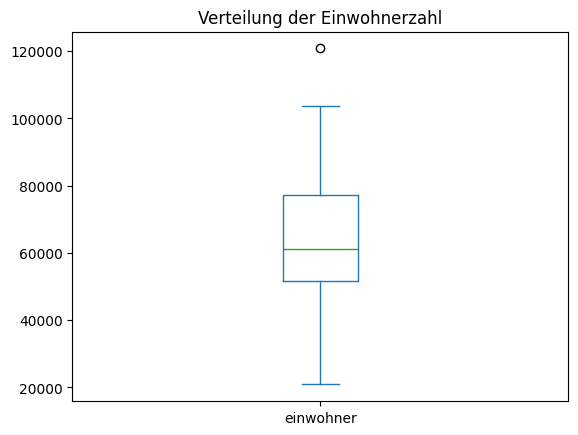

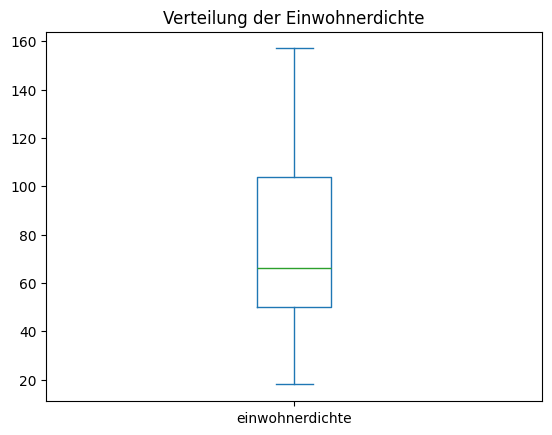

In [28]:
gdf_clean[["einwohner"]].plot(kind="box")
plt.title("Verteilung der Einwohnerzahl")
plt.show()

gdf_clean[["einwohnerdichte"]].plot(kind="box")
plt.title("Verteilung der Einwohnerdichte")
plt.show()


**Abbildung X: Boxplot der Einwohnerzahl der Stadtbezirke**

**Beschreibung:**  
Der Boxplot zeigt die Verteilung der Einwohnerzahl über alle 25 Stadtbezirke. Der Kasten markiert den Bereich zwischen dem 1. und 3. Quartil, die Linie im Kasten den Median, die „Whisker“ den übrigen Wertebereich ohne Ausreißer.

**Beobachtungen:**  
- Der Median der Einwohnerzahl liegt im Bereich von rund 60.000 Einwohnern pro Stadtbezirk.  
- Die Spannweite ist relativ groß: einige Bezirke haben nur etwas mehr als 20.000 Einwohner, während ein Bezirk mit über 120.000 Einwohnern als Ausreißer deutlich oberhalb der restlichen Werte liegt.  
- Insgesamt bestätigt der Boxplot die ungleiche Verteilung der Einwohnerzahlen, die bereits in den Balkendiagrammen sichtbar war.


**Abbildung X: Boxplot der Einwohnerdichte (Einw./ha) der Stadtbezirke**

**Beschreibung:**  
Der Boxplot stellt die Verteilung der Einwohnerdichte (Einwohner pro Hektar) dar. Wieder geben Quartile, Median und Whisker den zentralen Bereich und die Streuung der Werte an.

**Beobachtungen:**  
- Der Median der Einwohnerdichte liegt bei rund 60–70 Einw./ha.  
- Die Werte streuen deutlich: einige Bezirke weisen sehr geringe Dichten (unter 30 Einw./ha) auf, während besonders dichte Bezirke Werte von über 150 Einw./ha erreichen.  
- Der Boxplot unterstreicht damit, dass die Stadtbezirke sich nicht nur hinsichtlich der absoluten Einwohnerzahl, sondern auch in der Dichte stark unterscheiden – ein wichtiger Kontext für die spätere Bewertung „aktivitätsfördernder“ Infrastruktur pro Fläche und Einwohner.

